In [1]:
import yfinance as yf
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Pull IYT (Transportation ETF) data
ticker = "IYT" 
start= "2018-01-01" 
end= "2022-10-01"

transport = yf.download(ticker, start=start, end=end,progress=False)
transport = transport.asfreq(freq='D').ffill().dropna()
transport.to_csv('resources/transport.csv')
transport.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-26,199.940002,201.830002,197.110001,198.139999,198.139999,175200.0
2022-09-27,199.490005,201.869995,197.339996,199.580002,199.580002,554300.0
2022-09-28,199.779999,205.250000,199.220001,204.160004,204.160004,304100.0
2022-09-29,202.800003,202.800003,198.429993,200.580002,200.580002,155200.0
2022-09-30,199.800003,201.210007,196.539993,196.559998,196.559998,220700.0


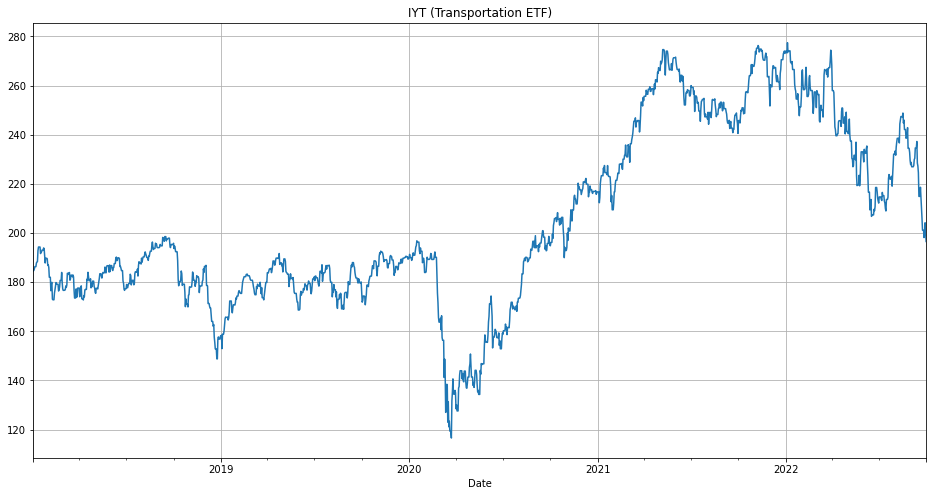

In [4]:
#Plot IYT historical prices
transport_plot = transport['Adj Close'].plot(figsize=(16,8), title='IYT (Transportation ETF)', grid=True)

In [5]:
# Pull S&P Index historical values from yfinance API
ticker = "^GSPC" 
start= "2018-01-01" 
end= "2022-10-01"

sp_history = yf.download(ticker, start=start, end=end, progress=False)
sp_history = sp_history.asfreq(freq='D').ffill().dropna()
sp_history.to_csv('resources/sp_history.csv')
sp_history.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-26,3682.719971,3715.669922,3644.760010,3655.040039,3655.040039,4.886140e+09
2022-09-27,3686.439941,3717.530029,3623.290039,3647.290039,3647.290039,4.577740e+09
2022-09-28,3651.939941,3736.739990,3640.610107,3719.040039,3719.040039,4.684850e+09
2022-09-29,3687.010010,3687.010010,3610.399902,3640.469971,3640.469971,4.681810e+09
2022-09-30,3633.479980,3671.439941,3584.129883,3585.620117,3585.620117,5.645360e+09


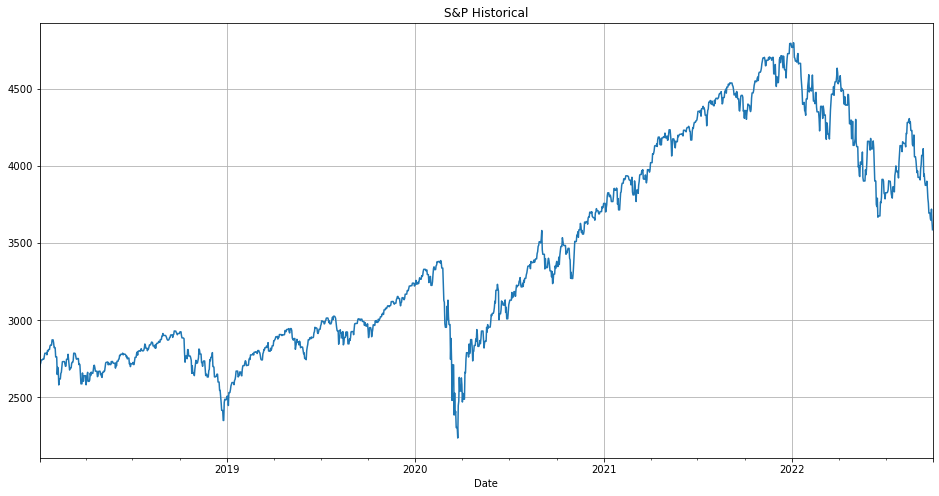

In [6]:
#Plot S&P Index historical data
sp_plot = sp_history['Adj Close'].plot(figsize=(16,8), title='S&P Historical', grid=True)

In [7]:
#Calculate IYT percent change and 200-day rolling average
transport_percent_change = transport['Adj Close'].pct_change()
transport_percent_change_rolling = transport_percent_change.rolling(window=200).mean()

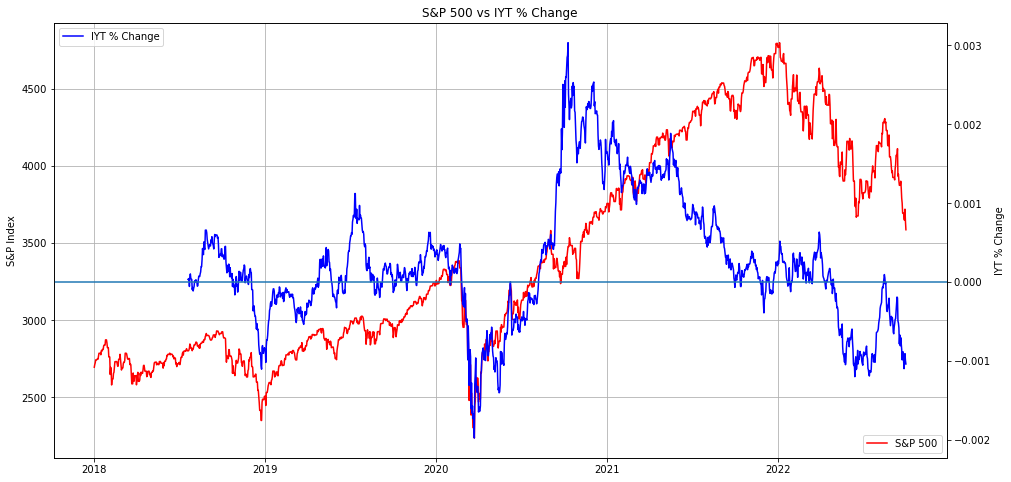

In [8]:
#Plot IYT percent change 200-day rolling average vs S&P 500 index to identify % change below and above y value of 0 
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(sp_history['Adj Close'], label ='S&P 500', color='r')
ax.set_ylabel('S&P Index')
plt.grid()
ax.legend(loc='lower right')

ax2 = ax.twinx()
plt.plot(transport_percent_change_rolling, label='IYT % Change', color='b')
ax.set_title('S&P 500 vs IYT % Change')
ax2.set_ylabel('IYT % Change')
ax2.axhline(y=0)
ax2.legend(loc='upper left')